In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib

path = kagglehub.dataset_download("prokshitha/home-value-insights")
df = pd.read_csv(path + "/house_price_regression_dataset.csv")

print(df.head())

100%|██████████| 26.4k/26.4k [00:00<00:00, 12.7MB/s]

Extracting files...
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [2]:
features = ["Square_Footage", "Num_Bedrooms", "Num_Bathrooms", "Year_Built"]
target = "House_Price"

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

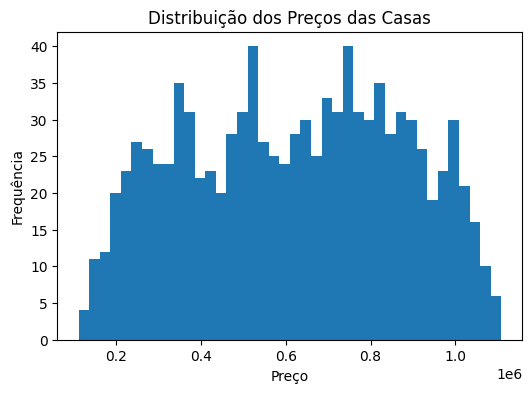

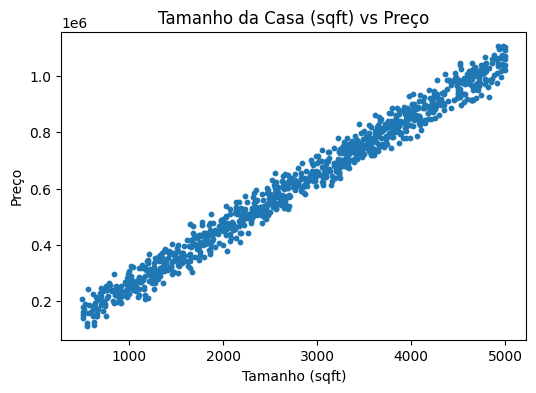

In [3]:
plt.figure(figsize=(6,4))
plt.hist(df["House_Price"], bins=40)
plt.title("Distribuição dos Preços das Casas")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df["Square_Footage"], df["House_Price"], s=10)
plt.title("Tamanho da Casa (sqft) vs Preço")
plt.xlabel("Tamanho (sqft)")
plt.ylabel("Preço")
plt.show()

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42)
}

mae_scores = {name: [] for name in models}

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=i
    )

    for name, model in models.items():
        m = model.__class__(**model.get_params())
        m.fit(X_train, y_train)
        preds = m.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        mae_scores[name].append(mae)

In [6]:
print("\n=== RESULTADOS (30 EXECUÇÕES) ===")
avg_mae = {}

for name in models:
    avg = np.mean(mae_scores[name])
    std = np.std(mae_scores[name])
    avg_mae[name] = avg
    print(f"{name}: MAE médio = {avg:.2f} | desvio = {std:.2f}")

melhor_model_nome = min(avg_mae, key=avg_mae.get)
print("\nMelhor modelo:", melhor_model_nome)


=== RESULTADOS (30 EXECUÇÕES) ===
LinearRegression: MAE médio = 18322.84 | desvio = 694.96
RandomForest: MAE médio = 21762.41 | desvio = 1033.18

Melhor modelo: LinearRegression


In [7]:
melhor_model = models[melhor_model_nome].__class__(**models[melhor_model_nome].get_params())
melhor_model.fit(X_scaled, y)


LinearRegression()

In [ ]:
print("\n=== TESTE DO MODELO DE PREÇO DE CASAS ===")

tamanho_m2 = float(input("Tamanho da casa (em metros²): "))
quartos = int(input("Número de quartos: "))
banheiros = int(input("Número de banheiros: "))
ano = int(input("Ano de construção: "))

square_footage = tamanho_m2 * 10.7639

entrada = pd.DataFrame({
    "Square_Footage": [square_footage],
    "Num_Bedrooms": [quartos],
    "Num_Bathrooms": [banheiros],
    "Year_Built": [ano]
})

entrada_scaled = scaler.transform(entrada)

preco = melhor_model.predict(entrada_scaled)[0]

print(f"\n Preço estimado da casa: US$ {preco:,.2f}")


=== TESTE DO MODELO DE PREÇO DE CASAS ===


In [ ]:
joblib.dump(melhor_model, "modelo_preco_casas.pkl")
joblib.dump(scaler, "scaler_preco_casas.pkl")

print("\nModelos exportados")